## Chicago Pre-Processing and Modeling

In [1]:
#Importing Necessary Packages
%matplotlib inline
import scipy as sp
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

In [2]:
chicago = pd.read_csv('Chicago Data Cleanedup.csv')
chicago.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [3]:
#Forgot a step in my Data Wrangling, Adding Location Description Columns Just as I did for Crime type 
print(chicago.shape)
chicago=chicago[chicago['Location Description']!='OTHER']
chicago=pd.get_dummies(chicago, columns=['Location Description'])
print(chicago.shape)

(2547431, 89)
(2448162, 112)


In [4]:
chicago.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Description', 'Ward', 'Community Area',
       'FBI Code', 'X Coordinate', 'Y Coordinate',
       ...
       'Location Description_RESIDENCE PORCH/HALLWAY',
       'Location Description_RESIDENCE-GARAGE',
       'Location Description_RESIDENTIAL YARD (FRONT/BACK)',
       'Location Description_RESTAURANT',
       'Location Description_SCHOOL, PUBLIC, BUILDING',
       'Location Description_SCHOOL, PUBLIC, GROUNDS',
       'Location Description_SIDEWALK',
       'Location Description_SMALL RETAIL STORE',
       'Location Description_STREET',
       'Location Description_VEHICLE NON-COMMERCIAL'],
      dtype='object', length=112)

In [5]:
chicago.head()

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,...,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
0,11626027,03/16/2019 05:58:00 PM,001XX N WELLS ST,0460,SIMPLE,42.0,32.0,08B,1174723.0,1900866.0,...,0,0,0,0,0,0,0,0,1,0
1,11622422,03/12/2019 10:00:00 PM,008XX E 38TH PL,0820,$500 AND UNDER,4.0,36.0,06,1182276.0,1879784.0,...,0,0,1,0,0,0,0,0,0,0
2,11625922,03/14/2019 06:42:00 PM,074XX N PAULINA ST,0460,SIMPLE,49.0,1.0,08B,1163827.0,1949311.0,...,0,0,0,0,0,0,0,0,0,0
3,11626065,03/16/2019 03:16:00 PM,069XX W FARRAGUT AVE,0486,DOMESTIC BATTERY SIMPLE,41.0,10.0,08B,1129134.0,1934430.0,...,0,0,0,0,0,0,0,0,0,0
4,11647322,04/07/2019 04:08:00 AM,001XX W CONGRESS PKWY,051A,AGGRAVATED: HANDGUN,25.0,32.0,04A,1174840.0,1898032.0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
chicago=chicago.sample(50000)

In [7]:
chicago=chicago.drop(['ID', 'Date', 'Block', 'IUCR', 'Description', 'Ward', 'Community Area', 'FBI Code'], axis = 1)

In [8]:
chicago=chicago.drop(['X Coordinate', 'Y Coordinate', 'Year', 'Location', 'District', 'Primary Type', '24hour_time', 'Date_no_time'], axis = 1)

In [9]:
a=list(chicago.columns.values)
droplist=[]
for i in a:
    if i.startswith('Primary Type'):
        droplist.append(i)
chicago=chicago.drop(droplist, axis = 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
#Splitting our Training and Test Set into a 70-30 Split 
train, test = train_test_split(range(chicago.shape[0]), train_size=.7)

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
mask=np.ones(chicago.shape[0], dtype='int')
mask[train]=1
mask[test]=0
mask=(mask==1)

In [13]:
chicago.shape

(50000, 72)

In [14]:
chicago=chicago.dropna()

In [15]:
np.nan_to_num(chicago)

array([[ 41.88055914, -87.70203806,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 41.74733233, -87.54917171,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.96291674, -87.71627873,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 41.76916788, -87.58442326,   1.        , ...,   0.        ,
          0.        ,   1.        ],
       [ 41.94087757, -87.72754373,   0.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 41.87270229, -87.72646223,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [16]:
#These are our continuous features
Standardized = ['Latitude', 'Longitude', 'Closest Station', 'House_below_poverty', "Unemployed", 'Under18_over64', 'Income', 'HARDSHIP INDEX']
#This is a list that does not include the continuous features from the total features
variable = list(chicago.columns)
#We removed our 'serious' variable from the total list of features
variable.remove(u'serious')

In [17]:
print (len(Standardized), len(variable))

8 71


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#Standardizing our training and test set
chicago.loc[mask, Standardized] = StandardScaler().fit_transform(chicago.loc[mask, Standardized])
chicago.loc[~mask, Standardized] = StandardScaler().fit_transform(chicago.loc[~mask, Standardized])

In [20]:
chicago.head()

,Latitude,Longitude,serious,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,...,Location Description_RESIDENCE PORCH/HALLWAY,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL
1929508,0.467529,-0.530193,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
958663,-1.083171,2.095128,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
106929,1.360177,-0.741942,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2008807,0.413024,-1.394038,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
345809,-0.643523,0.818599,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


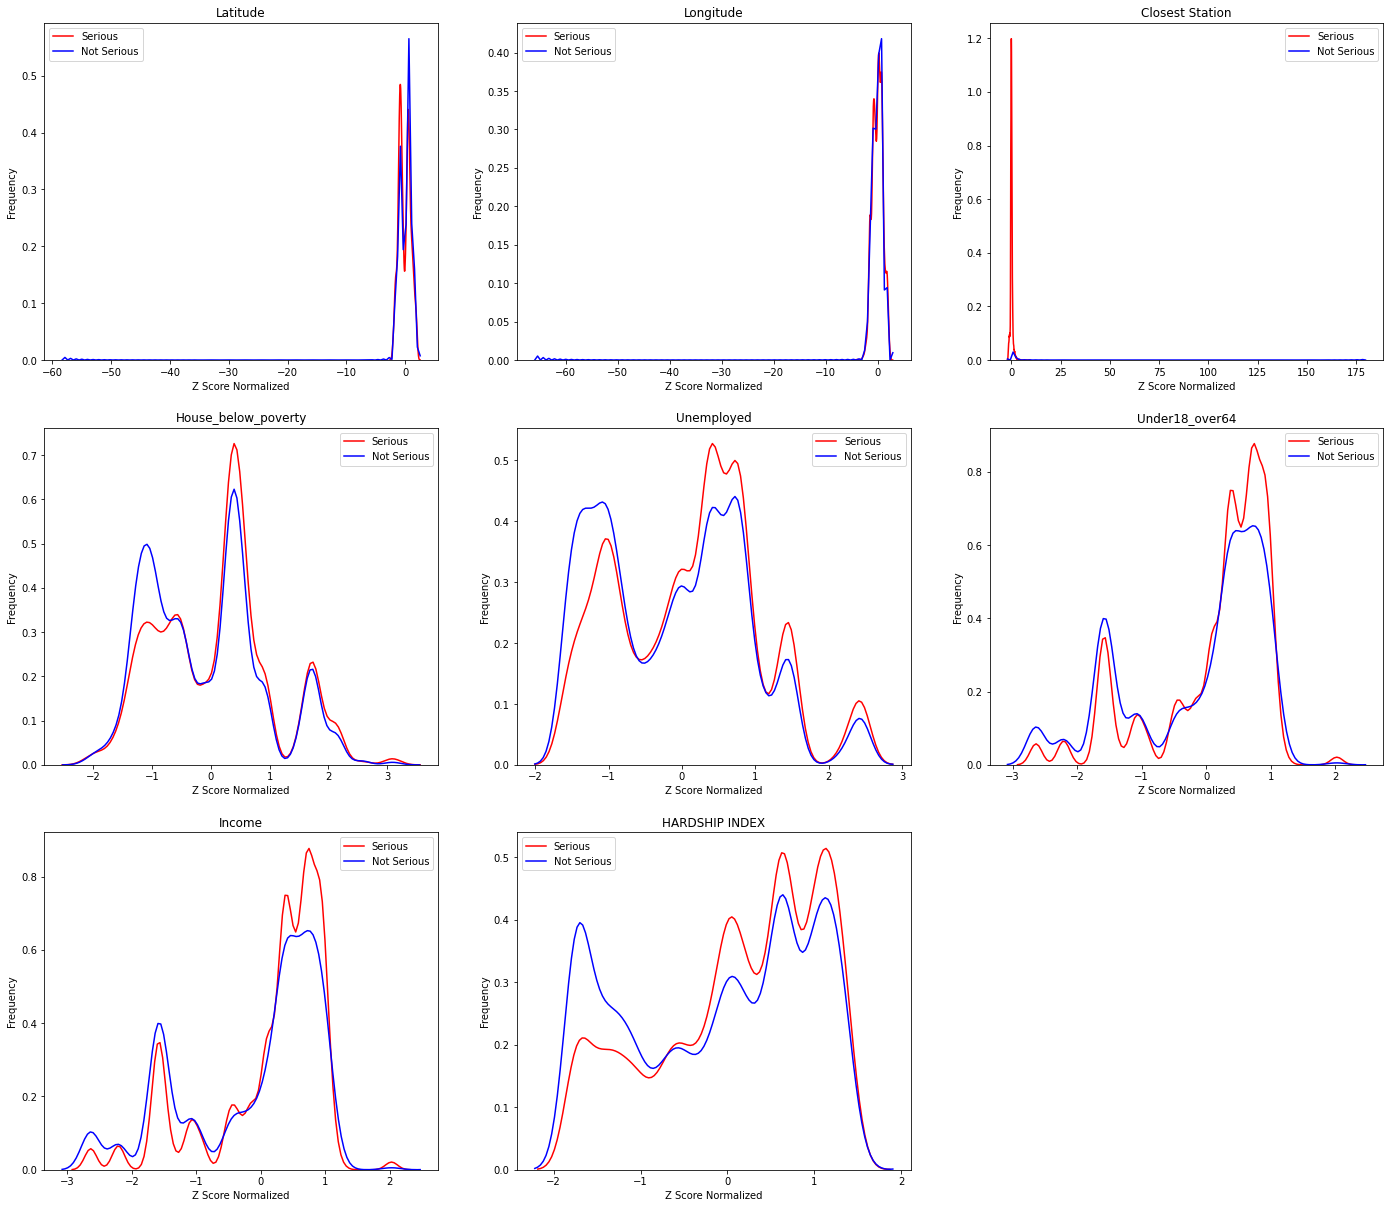

In [21]:
#Plotting a Kernel Density Estimate to visualize the distribution of observations in dataset
fig = plt.figure(figsize=(24,36))
positive=chicago[chicago['serious']==1]
negative=chicago[chicago['serious']==0]
for k in range (8):
    ax=fig.add_subplot(5, 3, k+1)
    sns.kdeplot(positive[Standardized[k]], color = 'red', label = 'Serious')
    sns.kdeplot(negative[Standardized[k]], color = 'blue', label = 'Not Serious')
    ax.set_title(Standardized[k])
    ax.set_xlabel('Z Score Normalized')
    ax.set_ylabel('Frequency')

A couple things to note here. The serious and the non-serious crimes are almost parallel to each other in all of the variables. All of these variables spread to about 3 standard deviations of their Z score from their mean which is pretty standard. 

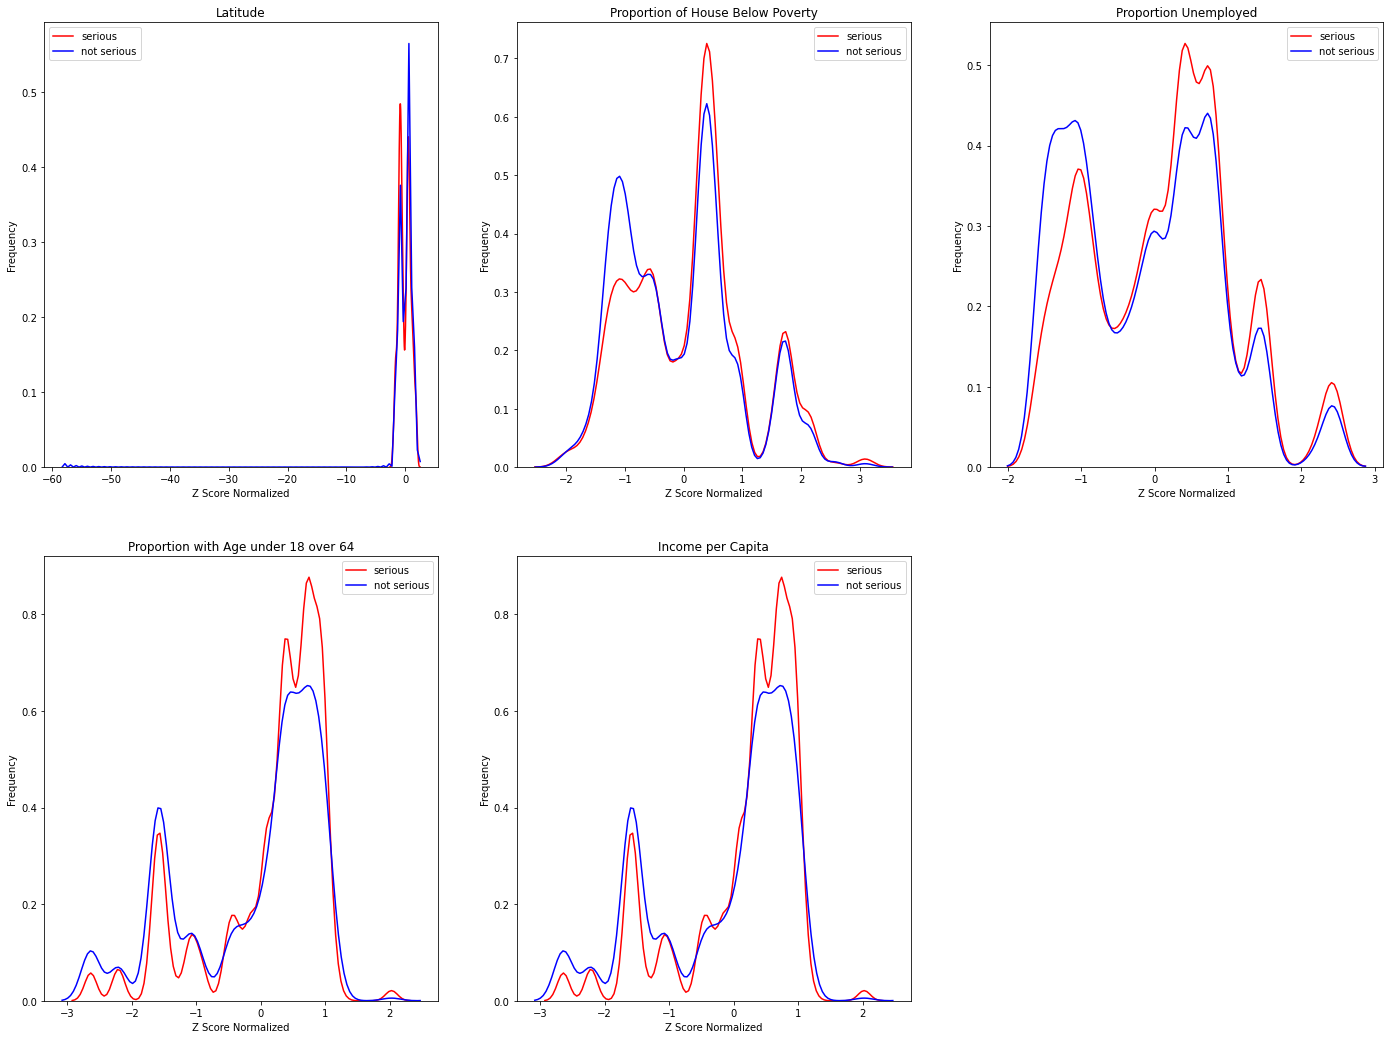

In [22]:
plotlist = ['Latitude', 'House_below_poverty', 'Unemployed', 'Under18_over64', 'Income']
plotlist_title = ['Latitude', 'Proportion of House Below Poverty', 'Proportion Unemployed', 'Proportion with Age under 18 over 64', 'Income per Capita']
fig=plt.figure(figsize=(24, 18))
for k in range (5):
    ax=fig.add_subplot(2, 3, k+1)
    sns.kdeplot(positive[plotlist[k]], color = 'red', label = 'serious')
    sns.kdeplot(negative[plotlist[k]], color = 'blue', label = 'not serious')
    ax.set_title(plotlist_title[k])
    ax.set_xlabel('Z Score Normalized')
    ax.set_ylabel('Frequency')

Similar to the last KDE plot, the variables run pretty parallel to each other. Proportion with Age under 18 over 64 and Income per capital have a slightly higher frequency for serious crimes as you go up in Z-score. 

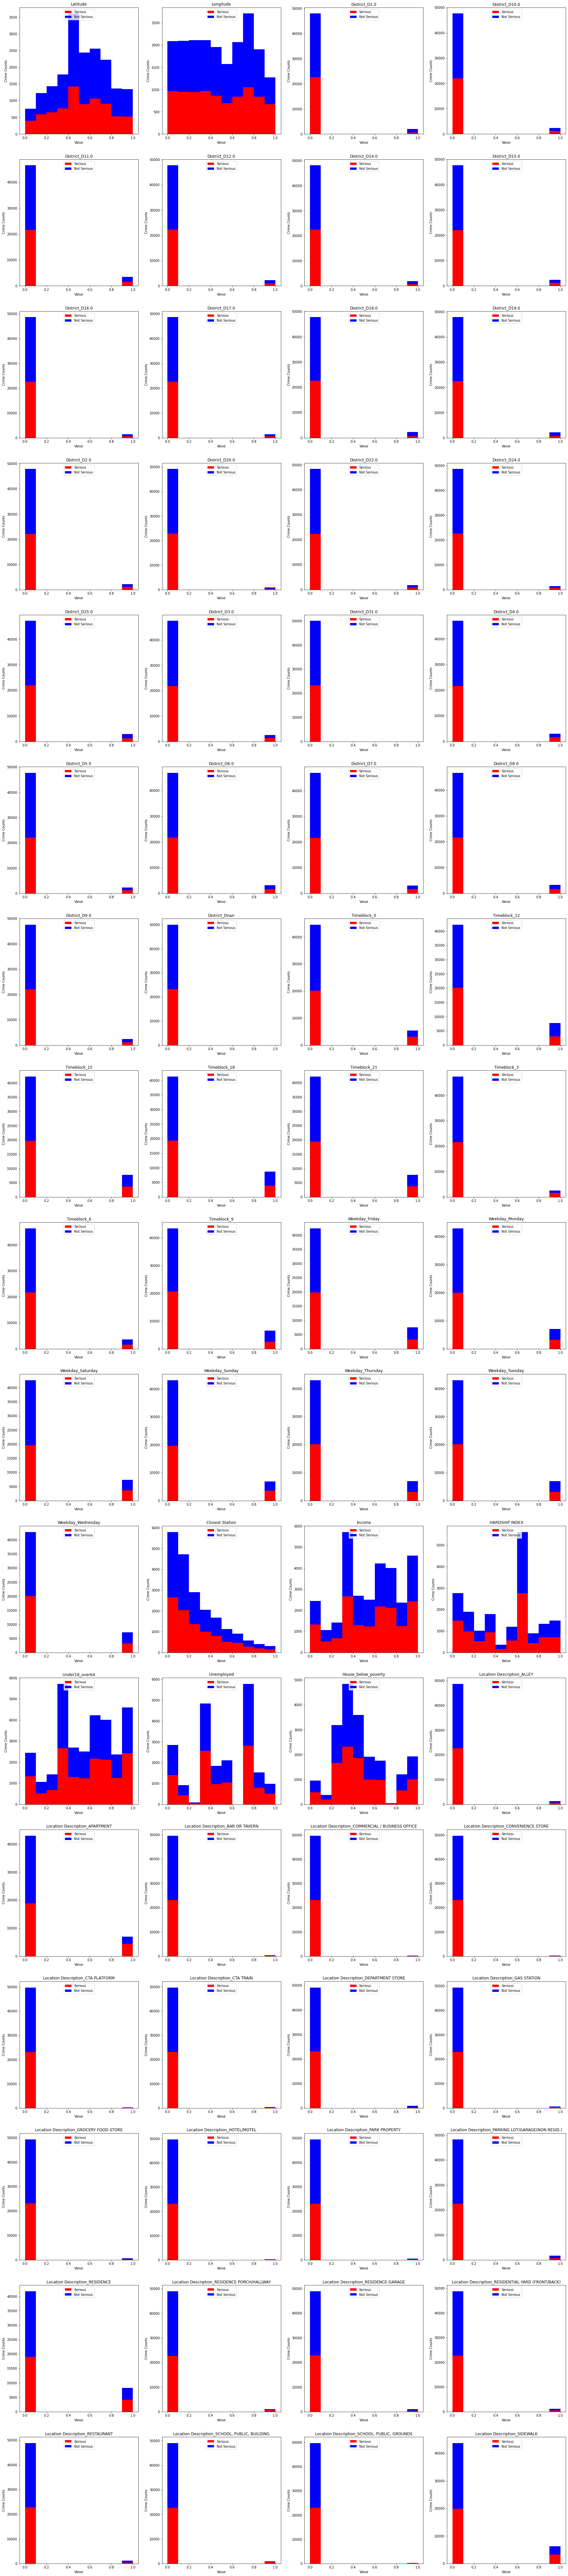

In [23]:
#Plotting a stacked Histogram, Red being Serious, Blue being not serious
fig=plt.figure(figsize=(30, 144))
positive=chicago[chicago['serious']==1]
negative=chicago[chicago['serious']==0]
for k in range (68):
    ax=fig.add_subplot(17, 4, k+1)
    ax.hist((positive[variable[k]], negative[variable[k]]), stacked=True, color = ('red', 'blue'), range = [0, 1])
    ax.set_title(variable[k])
    ax.legend(('Serious', 'Not Serious'), loc = 'upper center')
    ax.set_xlabel('Value')
    ax.set_ylabel('Crime Counts')

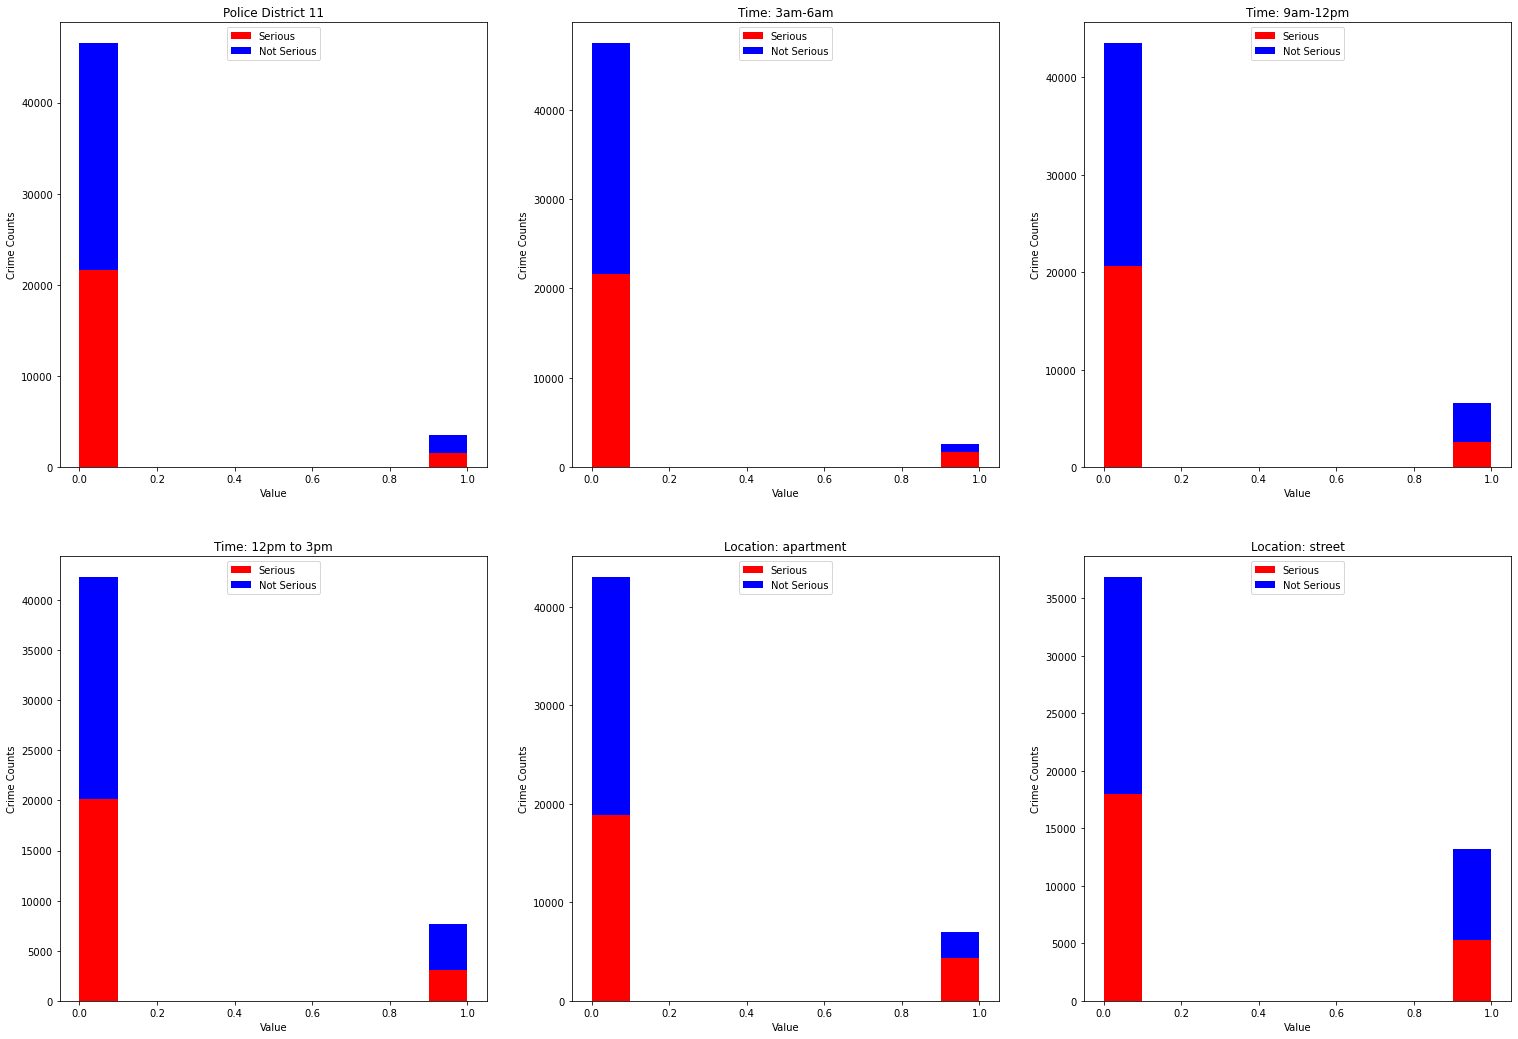

In [24]:
#Plotting Stacked Histograms for timeblocks of the day
fig=plt.figure(figsize=(26,18))
plotfeature=["District_D11.0","Timeblock_3","Timeblock_9","Timeblock_12","Location Description_APARTMENT","Location Description_STREET"]
plotfeature_title=["Police District 11","Time: 3am-6am","Time: 9am-12pm", "Time: 12pm to 3pm","Location: apartment","Location: street"]
for k in range (6):
    ax=fig.add_subplot(2,3,k+1)
    ax.hist((positive[plotfeature[k]],negative[plotfeature[k]]),stacked=True,color=("red","blue"),range=[0,1])
    ax.set_title(plotfeature_title[k])
    ax.legend(("Serious","Not Serious"),loc="upper center")
    ax.set_xlabel("Value")
    ax.set_ylabel("Crime Counts")

## Baseline Model

In [25]:
positive = chicago[chicago['serious']==1]
negative = chicago[chicago['serious']==0]
percent_serious=float(len(positive))/len(chicago)
percent_not_serious=float(len(negative))/len(chicago)
print (percent_serious, percent_not_serious)

0.46458 0.53542


In [26]:
#Creating a dictionary to store all our algorithms
algorithm_dict = {}
algorithm_dict['Baseline Model'] = np.asarray([[len(negative),0],[len(positive),0]])
#Creating a dictionary to store all of our models
model_dict = {}
#Creating a dictionary to store accuracy for training
accuracy_training_dict = {}
#Creating a dictionary to store accuracy for testing
accuracy_test_dict = {}
train_not_serious_percent = 1-float(sum(chicago['serious'].values[mask]))/len(chicago['serious'].values[mask])
test_not_serious_percent = 1-float(sum(chicago['serious'].values[~mask]))/len(chicago['serious'].values[~mask])
print (train_not_serious_percent, test_not_serious_percent)
accuracy_training_dict['Baseline Model']=train_not_serious_percent
accuracy_test_dict['Baseline Model']=test_not_serious_percent

0.5340571428571428 0.5386


Our percent of crimes that are considered serious is 47% and not serious to be 53%. When creating our baseline model, we see our training and test not serious crime is also about 53%.

In [27]:
#Adding our total features
logistic_features = Standardized + variable

In [28]:
#Importing Necessary package for logistic regression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

## Logistic Regression with Lasso

In [29]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print ("Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, confmatrix, training_accuracy, test_accuracy

In [30]:
def cv_optimize(clf, parameters, X, y, n_folds=5, score_func=None):
    if score_func:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs=GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(X, y)
    best = gs.best_estimator_
    return best

In [31]:
from sklearn.linear_model import LogisticRegression
clflog = LogisticRegression(penalty="l1")
clflog, Xtrain, ytrain, Xtest, ytest, confclflog, training_accuracy, test_accuracy=do_classify(clflog, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, chicago, logistic_features, u'serious', 1, mask=mask)
algorithm_dict["Logistic"]=confclflog
model_dict["Logistic"]=clflog
accuracy_training_dict["Logistic"]=training_accuracy
accuracy_test_dict["Logistic"]=test_accuracy

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: Futur

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: Futur

Training accuracy: 0.62
Test accuracy:     0.62
[[5593 2486]
 [3228 3693]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [32]:
clflog2 = LogisticRegression(penalty="l2")
clflog2, Xtrain, ytrain, Xtest, ytest, confclflog2, training_accuracy, test_accuracy=do_classify(clflog2, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 20.0, 40.0, 70.0, 100.0]}, chicago, logistic_features, u'serious', 1, mask=mask)

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: Futur

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:433: Futur

Training accuracy: 0.62
Test accuracy:     0.62
[[5559 2520]
 [3187 3734]]
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


The Lasso is a linear model that estimates sparse coefficients. After testing our model we get a training and testing accuracy of about 62%.

## Suppor Vector Machine

In [33]:
from sklearn.svm import LinearSVC
clfsvm=LinearSVC(loss="hinge")
clfsvm, Xtrain, ytrain, Xtest, ytest, confclfsvm, training_accuracy, test_accuracy= do_classify(clfsvm, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 50, 100.0]}, chicago, logistic_features, u'serious',1, mask=mask)
algorithm_dict["svm"]=confclfsvm
model_dict["svm"]=clfsvm
accuracy_training_dict["svm"]=training_accuracy
accuracy_test_dict["svm"]=test_accuracy

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblin

Training accuracy: 0.61
Test accuracy:     0.61
[[5285 2794]
 [3105 3816]]
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Support Vector Machines are a set of supervised learning methods that are effective in high dimensional spaces. After testing our model we get a training and testing set of 61%.

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier()
clfdt, Xtrain, ytrain, Xtest, ytest, confclfdt, training_accuracy, test_accuracy = do_classify(clfdt, {"max_depth":np.arange(1,20,2)}, chicago, logistic_features, u'serious',1, mask=mask)
algorithm_dict["decision tree"]=confclfdt
model_dict["decision tree"]=clfdt
accuracy_training_dict["decision tree"]=training_accuracy
accuracy_test_dict["decision tree"]=test_accuracy

Training accuracy: 0.62
Test accuracy:     0.60
[[5181 2898]
 [3154 3767]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Here in our Decision tree, another supervised learning method, we get a training and testing accuracy of about 62 and 60%. 

## Naives Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb, Xtrain, ytrain, Xtest, ytest, confgnb, training_accuracy, test_accuracy=do_classify(clfgnb, None, chicago, logistic_features, u'serious',1, mask=mask)
algorithm_dict["Naive Bayes"]=confgnb
model_dict["Naive Bayes"]=clfgnb
accuracy_training_dict["Naive Bayes"]=training_accuracy
accuracy_test_dict["Naive Bayes"]=test_accuracy

Training accuracy: 0.56
Test accuracy:     0.56
[[4744 3335]
 [3321 3600]]
GaussianNB(priors=None, var_smoothing=1e-09)


Naive Bayes applies Bayes' theorem with the "naive" assumpption of conditional independence between every pair of features given the value of the class variable. Here we get an accuracy of about 56%. 

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
randf=RandomForestClassifier()
clfrdf, Xtrain, ytrain, Xtest, ytest, confrdf, training_accuracy, test_accuracy=do_classify(randf, {"n_estimators":[10, 20, 30, 40, 100]}, chicago, logistic_features, u'serious',1, mask=mask)
algorithm_dict["Random forest"]=confrdf
model_dict["Random forest"]=clfrdf
accuracy_training_dict["Random forest"]=training_accuracy
accuracy_test_dict["Random forest"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.59
[[5303 2776]
 [3406 3515]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Random Forest has the power to handle large data sets with higher dimensionality. It can handle thousands of input variables and identify most significant variables. The training accuracy tested at 100% and testing at about 59%.

## K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh, Xtrain1, ytrain1, Xtest1, ytest1, confknn, training_accuracy, test_accuracy=do_classify(neigh, {"n_neighbors":[5, 10, 20, 40]}, chicago, logistic_features, u'serious',1, mask=mask)
algorithm_dict["KNN"]=confknn
model_dict["KNN"]=neigh
accuracy_training_dict["KNN"]=training_accuracy
accuracy_test_dict["KNN"]=test_accuracy

Training accuracy: 0.63
Test accuracy:     0.60
[[5766 2313]
 [3733 3188]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=40, p=2,
           weights='uniform')


A major drawback of KNN is it significantly slows as the size of that data in use grows. We get a training and testing accuracy of 63 and 60 percent. 

<AxesSubplot:title={'center':'Training Accuracy'}>

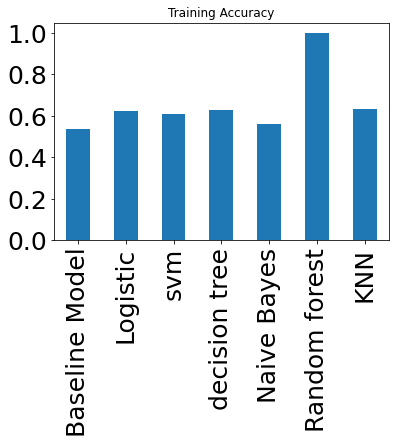

In [39]:
pd.Series(accuracy_training_dict).plot(kind='bar', title='Training Accuracy', fontsize=25)

<AxesSubplot:title={'center':'Test Accuracy'}>

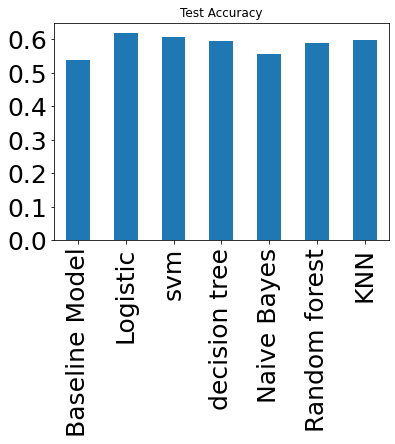

In [40]:
pd.Series(accuracy_test_dict).plot(kind='bar', title='Test Accuracy', fontsize=25)

I plotted everything here into a bar graph, and the most important thing to note is the Random Forest training accuracy. 

In [42]:
#Coefficient Function
def coef_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=logistic_features, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort_values('abscoef', ascending=False)
lasso_importances=coef_lasso(clflog)
lasso_importances.head(50)

,feature,coef,abscoef
62,Location Description_DEPARTMENT STORE,-1.640735,1.640735
74,"Location Description_SCHOOL, PUBLIC, GROUNDS",1.085269,1.085269
73,"Location Description_SCHOOL, PUBLIC, BUILDING",0.902477,0.902477
64,Location Description_GROCERY FOOD STORE,-0.832584,0.832584
56,Location Description_APARTMENT,0.741321,0.741321
39,Timeblock_3,0.659701,0.659701
76,Location Description_SMALL RETAIL STORE,-0.630873,0.630873
69,Location Description_RESIDENCE PORCH/HALLWAY,0.624302,0.624302
70,Location Description_RESIDENCE-GARAGE,-0.420711,0.420711
41,Timeblock_9,-0.392885,0.392885


When identify if a crime is serious or not based on coefficients we see some of the most import features are department store, school public grounds, school public building, and grocery store. 

In [76]:
chicago2 = pd.read_csv('Chicago Data Cleanedup.csv')
chicago2.drop(['Unnamed: 0'], axis='columns', inplace=True)
print(chicago2.shape)
chicago2=chicago2[chicago2['Location Description']!='OTHER']
chicago2=pd.get_dummies(chicago2, columns=['Location Description'])
print(chicago2.shape)

(2547431, 89)
(2448162, 112)


In [77]:
chicago2=chicago2.sample(50000)

In [78]:
chicago2 = chicago2.fillna(chicago2.mean())

In [79]:
#Adding a column of the top 4 crimes 
print(chicago2.shape)
chicago2["Top 4 Crimes"]=chicago2["Primary Type_THEFT"]+chicago2["Primary Type_BATTERY"]+chicago2["Primary Type_NARCOTICS"]+chicago2["Primary Type_CRIMINAL DAMAGE"]
chicago2=chicago2[chicago2["Top 4 Crimes"]==1]
print(chicago2.shape)
chicago2.head()

(50000, 112)
(32424, 113)


,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,...,Location Description_RESIDENCE-GARAGE,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Top 4 Crimes
1639914,8292399,09/22/2011 10:30:00 AM,024XX N KENTON AVE,1812,POSS: CANNABIS MORE THAN 30GMS,31.0,19.0,18,1145209.0,1915794.0,...,0,0,0,0,0,0,0,0,0,1
1874460,8715769,07/19/2012 03:30:00 PM,002XX N PARKSIDE AVE,0820,$500 AND UNDER,29.0,25.0,06,1138552.0,1901156.0,...,0,0,0,0,1,0,0,0,0,1
145435,11411136,08/12/2018 02:56:00 AM,030XX N CENTRAL AVE,041A,AGGRAVATED - HANDGUN,31.0,19.0,04B,1138504.0,1919723.0,...,0,0,0,0,0,0,0,1,0,1
318813,10335366,12/05/2015 09:54:00 PM,056XX S BISHOP ST,2017,MANU/DELIVER:CRACK,16.0,67.0,18,1167627.0,1867367.0,...,0,0,0,0,0,0,0,0,0,1
274558,10248305,09/23/2015 10:39:00 PM,011XX W MONTANA ST,0810,OVER $500,43.0,7.0,06,1168335.0,1916455.0,...,0,0,0,0,0,0,0,1,0,1


In [80]:
#Creating a function and column to differentiate the top 4 Crimes 
def categorical(row):
    if row=="THEFT":
        return int(0)
    elif row=="BATTERY":
        return int(1)
    elif row=="CRIMINAL DAMAGE":
        return int(2)
    elif row=="NARCOTICS":
        return int(3)
    
chicago2["Crime Differentiation"]=chicago2["Primary Type"].apply(categorical)

In [81]:
chicago2 = chicago2.reset_index(drop=True)
chicago2.head()

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,...,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Top 4 Crimes,Crime Differentiation
0,8292399,09/22/2011 10:30:00 AM,024XX N KENTON AVE,1812,POSS: CANNABIS MORE THAN 30GMS,31.0,19.0,18,1145209.0,1915794.0,...,0,0,0,0,0,0,0,0,1,3
1,8715769,07/19/2012 03:30:00 PM,002XX N PARKSIDE AVE,0820,$500 AND UNDER,29.0,25.0,06,1138552.0,1901156.0,...,0,0,0,1,0,0,0,0,1,0
2,11411136,08/12/2018 02:56:00 AM,030XX N CENTRAL AVE,041A,AGGRAVATED - HANDGUN,31.0,19.0,04B,1138504.0,1919723.0,...,0,0,0,0,0,0,1,0,1,1
3,10335366,12/05/2015 09:54:00 PM,056XX S BISHOP ST,2017,MANU/DELIVER:CRACK,16.0,67.0,18,1167627.0,1867367.0,...,0,0,0,0,0,0,0,0,1,3
4,10248305,09/23/2015 10:39:00 PM,011XX W MONTANA ST,0810,OVER $500,43.0,7.0,06,1168335.0,1916455.0,...,0,0,0,0,0,0,1,0,1,0


In [82]:
def do_classify2(clf, parameters, indf, featurenames,targetname, mask, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
#y will be an array with integer values for different categories (0, 1, 2, 3...)
    y=indf[targetname]
    Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("Training accuracy: %0.2f" % (training_accuracy))
    print( "Test accuracy:     %0.2f" % (test_accuracy))
    confmatrix=confusion_matrix(ytest, clf.predict(Xtest))
    print (confmatrix)
    print (clf)
    return clf, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy

In [83]:
mask=np.ones(chicago2.shape[0], dtype='int')
train, test = train_test_split(range(chicago2.shape[0]), train_size=0.7)
mask[train]=1
mask[test]=0
mask=(mask==1)

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [84]:
chicago2.loc[mask,Standardized]=StandardScaler().fit_transform(chicago2.loc[mask,Standardized])
chicago2.loc[~mask,Standardized]=StandardScaler().fit_transform(chicago2.loc[~mask,Standardized])
chicago2.head()

,ID,Date,Block,IUCR,Description,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,...,Location Description_RESIDENTIAL YARD (FRONT/BACK),Location Description_RESTAURANT,"Location Description_SCHOOL, PUBLIC, BUILDING","Location Description_SCHOOL, PUBLIC, GROUNDS",Location Description_SIDEWALK,Location Description_SMALL RETAIL STORE,Location Description_STREET,Location Description_VEHICLE NON-COMMERCIAL,Top 4 Crimes,Crime Differentiation
0,8292399,09/22/2011 10:30:00 AM,024XX N KENTON AVE,1812,POSS: CANNABIS MORE THAN 30GMS,31.0,19.0,18,1145209.0,1915794.0,...,0,0,0,0,0,0,0,0,1,3
1,8715769,07/19/2012 03:30:00 PM,002XX N PARKSIDE AVE,0820,$500 AND UNDER,29.0,25.0,06,1138552.0,1901156.0,...,0,0,0,1,0,0,0,0,1,0
2,11411136,08/12/2018 02:56:00 AM,030XX N CENTRAL AVE,041A,AGGRAVATED - HANDGUN,31.0,19.0,04B,1138504.0,1919723.0,...,0,0,0,0,0,0,1,0,1,1
3,10335366,12/05/2015 09:54:00 PM,056XX S BISHOP ST,2017,MANU/DELIVER:CRACK,16.0,67.0,18,1167627.0,1867367.0,...,0,0,0,0,0,0,0,0,1,3
4,10248305,09/23/2015 10:39:00 PM,011XX W MONTANA ST,0810,OVER $500,43.0,7.0,06,1168335.0,1916455.0,...,0,0,0,0,0,0,1,0,1,0


## Multiclass Baseline Model

In [85]:
print(float(len(chicago2[chicago2["Crime Differentiation"]==0]))/len(chicago2))
train_theft_percent=float(sum(chicago2["Primary Type_THEFT"].values[mask]))/len(chicago2["Primary Type_THEFT"].values[mask])
test_theft_percent=float(sum(chicago2["Primary Type_THEFT"].values[~mask]))/len(chicago2["Primary Type_THEFT"].values[~mask])

print(train_theft_percent)
print(test_theft_percent)

accuracy_multi_train={}
accuracy_multi_test={}
accuracy_multi_train["Baseline model"]=train_theft_percent
accuracy_multi_test["Baseline model"]=test_theft_percent

0.35658771280532936
0.35667077899189287
0.35639391447368424


## Multiclass Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
clfdt_multi=DecisionTreeClassifier()
clfdt_multi, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clfdt_multi, {"max_depth":np.arange(1,20,2)}, chicago2, logistic_features, "Crime Differentiation", mask=mask)
accuracy_multi_train["Decision tree multiclass"]=training_accuracy
accuracy_multi_test["Decision tree multiclass"]=test_accuracy

Training accuracy: 0.54
Test accuracy:     0.49
[[2476  644  121  226]
 [ 936 1652  100  334]
 [ 933  563  102  169]
 [ 594  301   14  563]]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## Multiclass Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
randfmulti=RandomForestClassifier()
randfmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(randfmulti, {"n_estimators":[10, 20, 30, 40, 100]}, chicago2, logistic_features, "Crime Differentiation", mask=mask)
accuracy_multi_train["Random forest multiclass"]=training_accuracy
accuracy_multi_test["Random forest multiclass"]=test_accuracy

Training accuracy: 1.00
Test accuracy:     0.50
[[2254  738  314  161]
 [ 750 1752  270  250]
 [ 731  615  318  103]
 [ 333  462  168  509]]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


## Multiclass Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
clflogmulti=LogisticRegression(penalty="l2",multi_class='multinomial',solver="newton-cg",max_iter=100)
clflogmulti, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti, {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, chicago2, logistic_features, 'Crime Differentiation', mask=mask)
accuracy_multi_train["Logistic - newton cg"]=training_accuracy
accuracy_multi_test["Logistic - newton cg"]=test_accuracy

Training accuracy: 0.54
Test accuracy:     0.54
[[2357  718  228  164]
 [ 602 1984  143  293]
 [ 721  659  263  124]
 [ 367  319  128  658]]
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


In [92]:
from sklearn.linear_model import LogisticRegression
clflogmulti2 = LogisticRegression(penalty="l2",multi_class='multinomial',solver="lbfgs",max_iter=400)
clflogmulti2, Xtrain, ytrain, Xtest, ytest, training_accuracy, test_accuracy=do_classify2(clflogmulti2, {"C": [0.01, 0.1, 1.0, 10.0]}, chicago2, logistic_features, 'Crime Differentiation', mask=mask)
accuracy_multi_train["Logistic - lbfgs"]=training_accuracy
accuracy_multi_test["Logistic - lbfgs"]=test_accuracy

C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: l

Training accuracy: 0.54
Test accuracy:     0.54
[[2358  718  228  163]
 [ 601 1985  143  293]
 [ 722  658  263  124]
 [ 367  320  128  657]]
LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=400, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\bsnus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


<AxesSubplot:title={'center':'Training accuracy'}>

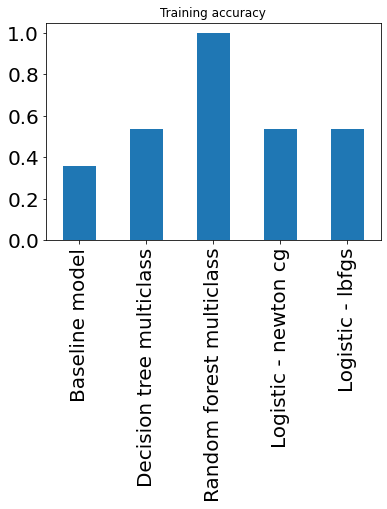

In [93]:
pd.Series(accuracy_multi_train).plot(kind="bar",title="Training accuracy", fontsize=20)

<AxesSubplot:title={'center':'Test accuracy'}>

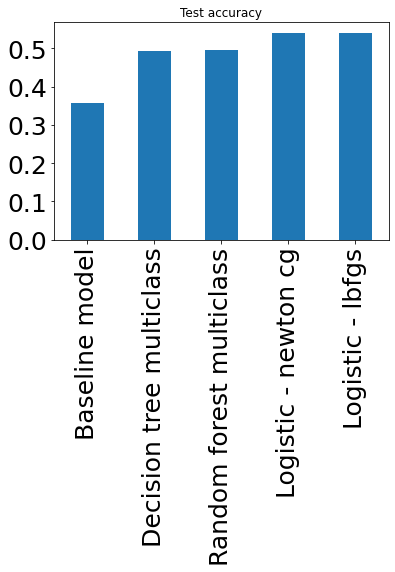

In [94]:
pd.Series(accuracy_multi_test).plot(kind="bar",title="Test accuracy", fontsize=25)

After our bar graph plotting, we see that the training accuracy is high for Random forest and for testing it is logistic regression. 

In [99]:
lasso_importances_multi=coef_lasso(clflogmulti)
lasso_importances_multi.head(50)

,feature,coef,abscoef
62,Location Description_DEPARTMENT STORE,1.955381,1.955381
64,Location Description_GROCERY FOOD STORE,1.469881,1.469881
55,Location Description_ALLEY,-1.346190,1.346190
57,Location Description_BAR OR TAVERN,1.317098,1.317098
75,Location Description_SIDEWALK,-1.200522,1.200522
58,Location Description_COMMERCIAL / BUSINESS OFFICE,1.086883,1.086883
76,Location Description_SMALL RETAIL STORE,1.062653,1.062653
74,"Location Description_SCHOOL, PUBLIC, GROUNDS",-0.946189,0.946189
65,Location Description_HOTEL/MOTEL,0.846309,0.846309
56,Location Description_APARTMENT,-0.834617,0.834617


A little bit different than the first one but we can see our most important features for multiclass are department store, grocery food store, alley, bar, and sidewalk. 